# FACE RECOGNITION MODEL USING TENSORFLOW

# Introduction

Face recognition is a technology that identifies or verifies a person by analyzing their facial features. It works similarly to how humans recognize each other by looking at faces.

Today will implement face recognition model with the use of a dataset contains hollywood actors image. first will divide the dataset into two folder as validation data and training data with 8:2 in ratio. then will implement our pretrained model MobileNetV2, which is already trained with a large dataset.

# step 1: importing the libraries

In [1]:


# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


# step 2: splitting the data into training and validation data

In [9]:
!pip install split-folders

  Obtaining dependency information for split-folders from https://files.pythonhosted.org/packages/b6/d5/307d63c03356bad6e141d8718d3f4116f51bd9c4b09e2614ffcee1f3c6fd/split_folders-0.5.1-py3-none-any.whl.metadata


In [11]:
import splitfolders

# Path to the dataset directory containing subfolders
input_folder = "C:/Users/sachin/MSC data science/face recognition model/dataset"

# Output directories
output_folder = "C:/Users/sachin/MSC data science/face recognition model"

# Split the dataset
# The ratio argument specifies the proportion of data to be used for training, validation, and test respectively
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2))

# This will create the structure in the output directory as:
# output/
# ├── train/
# │   ├── person1/
# │   ├── person2/
# │   └── ...
# └── val/
#     ├── person1/
#     ├── person2/
#     └── ...

Copying files: 23216 files [00:39, 586.43 files/s]


# step 3: Applying data augmentation

In [13]:
# Define directories for training and validation data
train_dir = "C:/Users/sachin/MSC data science/face recognition model/train"
validation_dir = "C:/Users/sachin/MSC data science/face recognition model/val"

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 18463 images belonging to 266 classes.
Found 4752 images belonging to 266 classes.


# Step 4:Model building using transfer learning

In [16]:
# Load the pretrained MobileNetV2 model without the top layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#  Step 5: Applying gradient to find best fit

In [25]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


Epoch 1/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 386s 666ms/step - accuracy: 0.2720 - loss: 3.3839 - val_accuracy: 0.2506 - val_loss: 3.5266
Epoch 2/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.2500 - loss: 3.4179 - val_accuracy: 0.3125 - val_loss: 3.1622
Epoch 3/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 376s 649ms/step - accuracy: 0.2846 - loss: 3.2679 - val_accuracy: 0.2747 - val_loss: 3.4121
Epoch 4/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.1875 - loss: 3.4468 - val_accuracy: 0.1250 - val_loss: 3.8976
Epoch 5/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 379s 653ms/step - accuracy: 0.3059 - loss: 3.1739 - val_accuracy: 0.2599 - val_loss: 3.4664
Epoch 6/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.3750 - loss: 2.7468 - val_accuracy: 0.3125 - val_loss: 3.4467
Epoch 7/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 384s 662ms/step - accuracy: 0.3186 - loss: 3.0754 - val_accuracy: 0.2895 - val_loss: 3.3088
Epoch 8/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.1562 - loss: 3

# Step 6: Model Evaluation

149/149 ━━━━━━━━━━━━━━━━━━━━ 57s 381ms/step - accuracy: 0.3003 - loss: 3.2216
Validation Accuracy: 31.33%


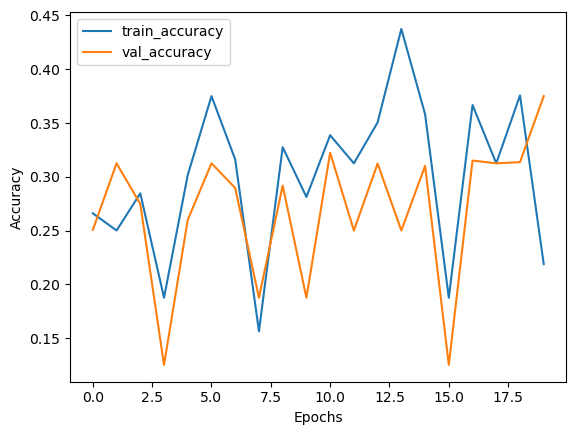

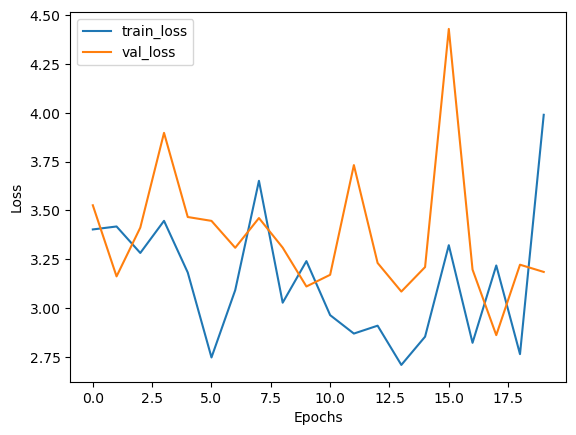

In [26]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
# Save the model
model.save('face_recognition_model.h5')


In [28]:
from tensorflow.keras.preprocessing import image

def predict_identity(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    class_labels = dict((v, k) for k, v in class_indices.items())
    
    return class_labels[predicted_class]

# Example usage
img_path = "C:/Users/sachin/Downloads/test_img.jpeg"
predicted_identity = predict_identity(img_path, model, train_generator.class_indices)
print(f'The predicted identity is: {predicted_identity}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The predicted identity is: Robert_Downey_Jr


# Intrepretation

Here we can say that the increasing in the number of epoch will create the inconsistency for our model so the perfect value of epoch is between 2 to 5 and 17 to 19. We can do more hyperparameter tuning to increase the validation accuracy. we just putted 20 as epoch to analyse the graph.